In [3]:
from sklearn import tree #ML datasaet
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
#################################### Learning exercise with decision trees ###########################

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
#classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
#predictors

In [9]:
X = data[['X_1','X_2']]

In [11]:
#what we predict

In [10]:
y = data.Y

In [13]:
#educating decision tree

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(0.25, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(0.75, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

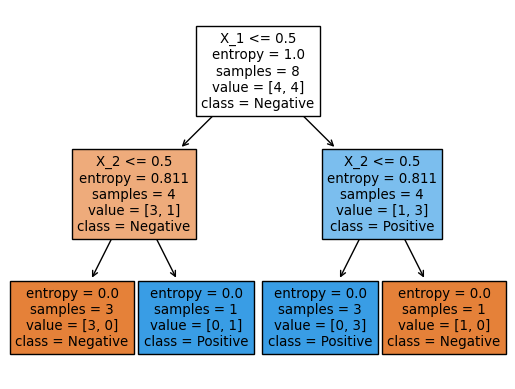

In [12]:
#vizualizing decision trr
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [16]:
#Entrophy = -sum(from 1 to n) of  p of i * log2 from p of i
#Entrophy = uncertanity level. Uncertinity is higher when it is more difficult to split obs into classes
# lower uncertanity = lower entrophy, max is 1

In [17]:
#Information Gain = E(Y) - E(Y|x) 
#Difference btw excpectation of Y and excpectation of Y given x
#Should be weigthed by share of observation in each branch
#Imagine we have a dataset that can be split into two parts, original entrophy is 1
#if in one branch there is only one obs => enthropy equals 0, wjile in the other entrhopy is still one,
#we can't say that enthropy is (1+0)/2 = 1/2, should multiple by weight

In [18]:
#https://www.r2d3.us/visual-intro-to-machine-learning-part-1/
#https://www.youtube.com/watch?v=-dCtJjlEEgM

In [19]:
#################################### Practice exercise with decision trees ###########################

In [13]:
cats = pd.read_csv(r"C:\Users\logo_\Downloads\cats.csv")

In [14]:
cats.head()

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик


In [22]:
#################################### Titanic exercise with decision trees ##########################

In [15]:
titanic_data = pd.read_csv(r"C:\Users\logo_\Documents\Python Scripts\train.csv")

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#checking for NA or NaN values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
X =  titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = pd.Series(titanic_data.Survived)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
#converting string variables (sex and embarked) into dummy variables

In [19]:
X = pd.get_dummies(X)

In [29]:
#filling missed values: basic naive filling

In [20]:
X = X.fillna({'Age' : X.Age.median()})

In [31]:
#building decision tree

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

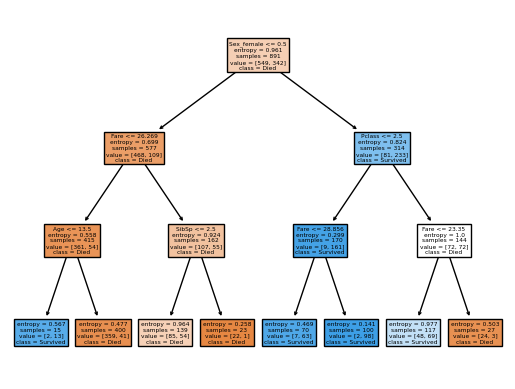

In [23]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True)
plt.show()

In [35]:
##### important package to split the dataset into training and test parts

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
clf.score(X, y)

0.8226711560044894

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
clf.score(X_train, y_train)

0.8238255033557047

In [29]:
clf.score(X_test, y_test)

0.8203389830508474

In [42]:
#creating simple model that allows us to estimate optimal depth of the model

In [30]:
max_depth_values = range(1, 50)

In [31]:
scores_data = pd.DataFrame()

In [32]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 
                                   'test_score' : [test_score]})
    scores_data = scores_data._append(temp_score_data)

In [33]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [47]:
#transorming data to ease vizualization

In [34]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

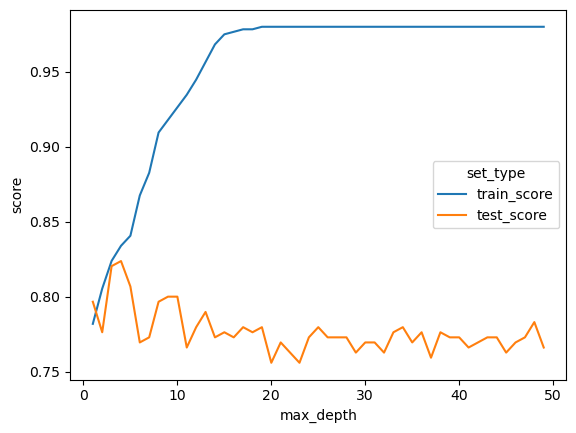

In [35]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [50]:
#still overfitted for depth 3-5, as we are asking every time to test our model on a particular test set
# So, it is overfitted, as it works the best for our test set that doesn't change from on attempt to another

In [51]:
#We need to pick one piece for final testing and then split remained pieces(e.g. into 5 parts)
#into validation and training parts. Then, subsequently change one piece that validate data

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
#cv = number of parts (folders) into which we split training data to cross-validate
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [54]:
scores_data = pd.DataFrame()

In [55]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 
                                   'test_score' : [test_score], 'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data._append(temp_score_data)

In [56]:
scores_data.head(3)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322


In [57]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

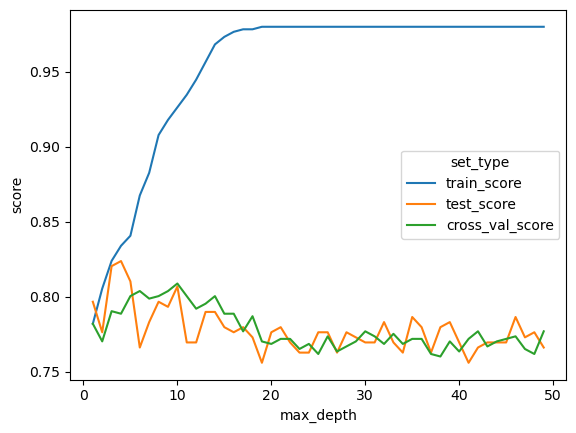

In [58]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [59]:
scores_data_long.query("set_type == 'cross_val_score'").sort_values(by='score', ascending=False).head(1)

,max_depth,set_type,score
107,10,cross_val_score,0.808754


In [60]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [61]:
best_clf.fit(X_train, y_train)
best_clf.score(X_train, y_train)

0.9077181208053692

In [62]:
#################################### Iris exercise with decision trees ##########################

In [63]:
iris_train  = pd.read_csv(r"C:\Users\logo_\Downloads\train_iris.csv")
iris_test = pd.read_csv(r"C:\Users\logo_\Downloads\test_iris.csv")
iris_test.shape

(50, 6)

In [64]:
X_train =  iris_train.drop(['Unnamed: 0', 'species'], axis=1)
y_train = pd.Series(iris_train.species)

In [65]:
X_test =  iris_test.drop(['Unnamed: 0', 'species'], axis=1)
y_test = pd.Series(iris_test.species)

In [66]:
max_depth_values = range(1, 100)

In [67]:
scores_data_iris = pd.DataFrame()

In [68]:
for max_depth in max_depth_values:
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_iris.fit(X_train, y_train)
    train_score = clf_iris.score(X_train, y_train)
    test_score = clf_iris.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 
                                   'accuracy_score' : [test_score]})
    scores_data_iris = scores_data_iris._append(temp_score_data)

In [69]:
scores_data_iris

,max_depth,train_score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.94
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.92


In [70]:
scores_data_long_iris = pd.melt(scores_data_iris, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score'],
                          var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

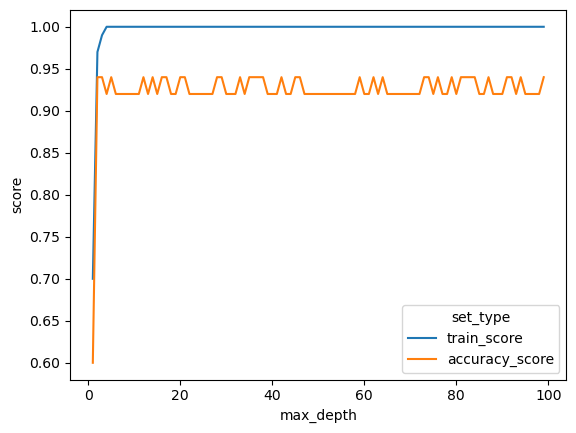

In [71]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long_iris)

In [72]:
################################ Cats & Dogs exercise with decision trees ##########################

In [2]:
animals = pd.read_csv(r"C:\Users\logo_\Downloads\dogs_n_cats.csv")
animals.head()

NameError: name 'pd' is not defined

In [74]:
animals_test = pd.read_json(r"C:\Users\logo_\Downloads\dataset_209691_15.txt")

In [75]:
animals.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [76]:
X_train= animals[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y_train = pd.Series(animals.Вид).replace({'собачка': 0, 'котик': 1})

In [77]:
clf_cats = tree.DecisionTreeClassifier(criterion='entropy', max_depth=)

SyntaxError: invalid syntax (1065248038.py, line 1)

In [ ]:
clf_cats.fit(X_train, y_train)

In [ ]:
predicted_number = pd.Series(clf_cats.predict(animals_test), name='Вид')

In [1]:
predicted_number.value_counts()

NameError: name 'predicted_number' is not defined